# Predicting EUR/USD pair using LSTM 

This is just an example of how it works.<br><br>
The hyperparemeters that were selected for our best model:<br>
    Test size: 20%<br>
    Timesteps per Timeseries: 150<br>
    Hidden Layers: 4<br>
    Units per Layer: 100<br>
    Batch Size: 128<br>
    Dropout: 0%<br>
    Optimizer: Adam<br>
    Learning Rate: 0.001<br>
    Loss Function: Mean Squared Error<br>
    Epochs: 100<br><br>
<b>Savvas Drosos & Nikolaos Karagkounis</b><br>
Full report: <a href="https://github.com/savvasdr/Predict-Stock-Price-LSTM" target="_blank">https://github.com/savvasdr/Predict-Stock-Price-LSTM</a>

## Part 1 - Data Preprocessing

Importing the libraries

In [22]:
import numpy as np
import pandas as pd

Importing the data set

In [23]:
dataset = pd.read_csv('dataset.csv')

Set basic parameters

In [24]:
timesteps = 120
test_size = 0.2

Set hyperparemeters

In [41]:
from keras.optimizers import Adam
parameters = {'hidden_layers': [2],
              'units_per_layer': [50],
              'dropout': [0.0],
              'batch_size': [128],
              'epochs': [20],
              'optimizer': [Adam(lr = 0.001)],
              'loss': ['mean_squared_error'],
              'metrics': ['accuracy']} 

### Processing the specific dataset

The code an next assumes that the prediction(y) is the last column of the dataset. <br>
If your dataset isn't ready, process it here.

<b>Convert dates to days</b><br>
0 is Monday - 4 is Friday<br>
Stock exchanges are closed on Weekends.

In [28]:
import datetime
for i in range (0, dataset.shape[0]):
    dataset.iloc[i,4] = datetime.datetime.strptime(dataset.iloc[i,4], '%m/%d/%Y').weekday()

We don't need the 2 last columns and we have to make 'Price' column being the last column.<br>
Swap 'Price' and "RSI' columns.

In [29]:
for i in range (0, dataset.shape[0]):
    dataset.iloc[i,16] = dataset.iloc[i,3]
    dataset.iloc[i,3] = dataset.iloc[i,15]
    dataset.iloc[i,15] = dataset.iloc[i,16]

Delete the unused columns

In [30]:
dataset = dataset.iloc[:,:16]

<b>Feature Scaling - Normalization</b>

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)

<b>Creating a 3D data structure with [timesteps] timesteps and one output</b><br>
[Samples, Timesteps, Features]<br>
x_train(Z) = [Features(Z-1)]<br>
y_train(Z) = [Feature(Z)]

In [32]:
x = []
y = []
for i in range(timesteps, dataset_scaled.shape[0]):
    x.append(dataset_scaled[i-timesteps:i, :dataset_scaled.shape[1]-1])
    y.append(dataset_scaled[i, dataset_scaled.shape[1]-1])
x, y = np.array(x), np.array(y)
y = np.reshape(y, (y.shape[0], 1))

<b>Splitting the dataset into the Training set and Test set</b>

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 0)

# Part 2 - Building the LSTM

Importing the Keras libraries and packages

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

<b>Build the regressor</b>

In [35]:
def build_regressor(hidden_layers, units_per_layer, dropout, optimizer, loss, metrics):
    # Initialising the LSTM
    regressor = Sequential()    
    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = units_per_layer, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
    regressor.add(Dropout(dropout))    
    # Adding new LSTM hidden layers if needed
    for i in range(0, hidden_layers-1):
        regressor.add(LSTM(units = units_per_layer, return_sequences = True))
        regressor.add(Dropout(dropout))
    # Adding the pre-last LSTM layer
    regressor.add(LSTM(units = units_per_layer))
    regressor.add(Dropout(dropout))    
    # Adding the output layer
    regressor.add(Dense(units = 1))    
    # Compiling the LSTM
    regressor.compile(optimizer = optimizer, loss = loss, metrics = metrics)    
    return regressor

<b>Train the model</b>

In [37]:
def fit_regressor(epochs, batch_size):
    return regressor.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test),  shuffle=True)

### Start Evaluating and Tuning our LSTM model

Train on 7976 samples, validate on 1995 samples
Epoch 1/20
7976/7976 [==============================] - 34s 4ms/step - loss: 0.0139 - acc: 1.2538e-04 - val_loss: 7.3178e-04 - val_acc: 5.0125e-04
Epoch 2/20
7976/7976 [==============================] - 30s 4ms/step - loss: 4.9818e-04 - acc: 1.2538e-04 - val_loss: 4.4072e-04 - val_acc: 5.0125e-04
Epoch 3/20
7976/7976 [==============================] - 29s 4ms/step - loss: 4.0702e-04 - acc: 1.2538e-04 - val_loss: 3.9599e-04 - val_acc: 5.0125e-04
Epoch 4/20
7976/7976 [==============================] - 30s 4ms/step - loss: 3.6741e-04 - acc: 1.2538e-04 - val_loss: 3.6840e-04 - val_acc: 5.0125e-04
Epoch 5/20
7976/7976 [==============================] - 30s 4ms/step - loss: 3.5061e-04 - acc: 1.2538e-04 - val_loss: 3.9922e-04 - val_acc: 5.0125e-04
Epoch 6/20
7976/7976 [==============================] - 30s 4ms/step - loss: 3.2698e-04 - acc: 1.2538e-04 - val_loss: 3.2455e-04 - val_acc: 5.0125e-04
Epoch 7/20
7976/7976 [============================

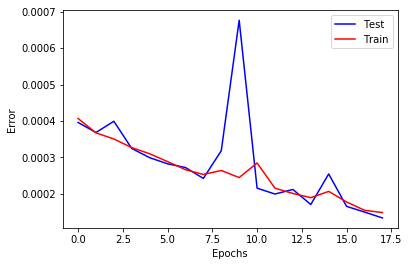

Layers:		 2 
Units per layer: 50 
Dropout:	 0.0 
Batch size:	 128 
Epochs:		 20 
Optimizer:	 <keras.optimizers.Adam object at 0x0000026C030B7390> 
Loss function:	 mean_squared_error 
Metrics:	 accuracy 
Loss (Train):	 0.00014862555752374296 
Loss (Test):	 0.00013393606839002457 




In [43]:
import matplotlib.pyplot as plt
results = []
best_parameters = []
best_loss = float("inf")
best_model = Sequential()  
for layers in parameters["hidden_layers"]:
    for units_per_layer in parameters["units_per_layer"]:
        for dropout in parameters["dropout"]:
            for batch_size in parameters["batch_size"]:
                for epochs in parameters["epochs"]:
                    for optimizer in parameters["optimizer"]:
                        for loss in parameters["loss"]:
                            for metrics in parameters["metrics"]:
                                regressor = build_regressor(int(layers), units_per_layer, dropout, optimizer, loss, [metrics])
                                history = fit_regressor(epochs, batch_size)
                                results.append([layers, units_per_layer, dropout, batch_size, epochs, optimizer, loss, metrics, 
                                                float(history.history['loss'][0]), float(history.history['val_loss'][0])])                                
                                plt.plot(history.history['val_loss'][2:epochs], color = 'blue', label = 'Test')
                                plt.plot(history.history['loss'][2:epochs], color = 'red', label = 'Train')
                                plt.xlabel('Epochs')
                                plt.ylabel('Error')
                                plt.legend()
                                plt.show()
                                print('Layers:\t\t',layers,'\nUnits per layer:',units_per_layer,'\nDropout:\t',dropout,'\nBatch size:\t', batch_size, 
                                      '\nEpochs:\t\t',epochs,'\nOptimizer:\t',optimizer,'\nLoss function:\t',loss,'\nMetrics:\t',metrics,
                                      '\nLoss (Train):\t',history.history['loss'][epochs-1],'\nLoss (Test):\t',history.history['val_loss'][epochs-1],'\n\n')
                                # Keep the best model
                                if float(history.history['loss'][epochs-1]) < best_loss:
                                    best_model = regressor                                 
                                    best_loss = float(history.history['loss'][0])
                                    best_parameters.clear()
                                    best_parameters.append([layers, units_per_layer, dropout, batch_size, epochs, optimizer, loss, metrics,
                                                           float(history.history['loss'][0]), float(history.history['val_loss'][0]),
                                                           float(history.history['acc'][0]), float(history.history['val_acc'][0])])

Show the best parameters

In [44]:
print('************* Best parameters *************')
print('* Layers:\t',best_parameters[0][0],'\n* Units:\t',best_parameters[0][1],'\n* Dropout:\t',best_parameters[0][2],'\n* Batch size:\t', 
      best_parameters[0][3],'\n* Epochs:\t',best_parameters[0][4],'\n* Optimizer:\t',best_parameters[0][5],'\n* Loss function:',best_parameters[0][6],
      '\n* Metrics:\t',best_parameters[0][7],'\n* Loss (Train):\t',best_parameters[0][8],'\n* Loss (Test):\t',best_parameters[0][9])

print('\n*******************************************\n')

************* Best parameters *************
* Layers:	 2 
* Units:	 50 
* Dropout:	 0.0 
* Batch size:	 128 
* Epochs:	 20 
* Optimizer:	 <keras.optimizers.Adam object at 0x0000026C030B7390> 
* Loss function: mean_squared_error 
* Metrics:	 accuracy 
* Loss (Train):	 0.013881271123480232 
* Loss (Test):	 0.0007317768081609524

*******************************************



## Part 3 - Making a single prediction

INSERT HERE your timeseries in this array [Timesteps]x[Features]

In [45]:
for_predict = x_test[0,:] # For example, take the first timeseries of the Test set

<b>Reshape and predict</b><br>
It will use the best trained regressor

In [46]:
for_predict = np.reshape(for_predict, (1,for_predict.shape[0], for_predict.shape[1]))
predictions_scaled = best_model.predict(for_predict)

<b>Invert MinMax transform</b><br>
Our scaler have used a specific array size.<br>
We have to add some padding to be able to inverse the transform correctly.

In [47]:
padding = np.zeros((for_predict.shape[0],dataset.shape[1]-1))
predictions_scaled = np.append(padding, predictions_scaled, axis=1)
predictions_scaled = sc.inverse_transform(predictions_scaled)
predictions = predictions_scaled[:,dataset_scaled.shape[1]-1]

<b>Calculate RMSE for the new predictions</b><br>
ADD HERE the actual values to the actual_values (without normalization)

In [48]:
actual_values = [1.110] # Just an example

Calculate RMS

In [49]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(predictions, actual_values))
print('Predictions RMSE: %.3f' % rmse)

Predictions RMSE: 0.082
